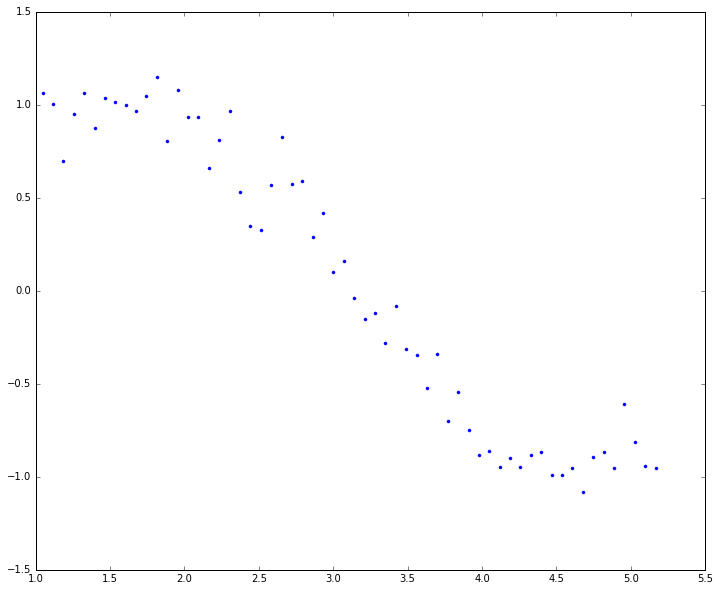

In [15]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

valores=range(60,300,4)

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in valores])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [11]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print data.head()

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [12]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

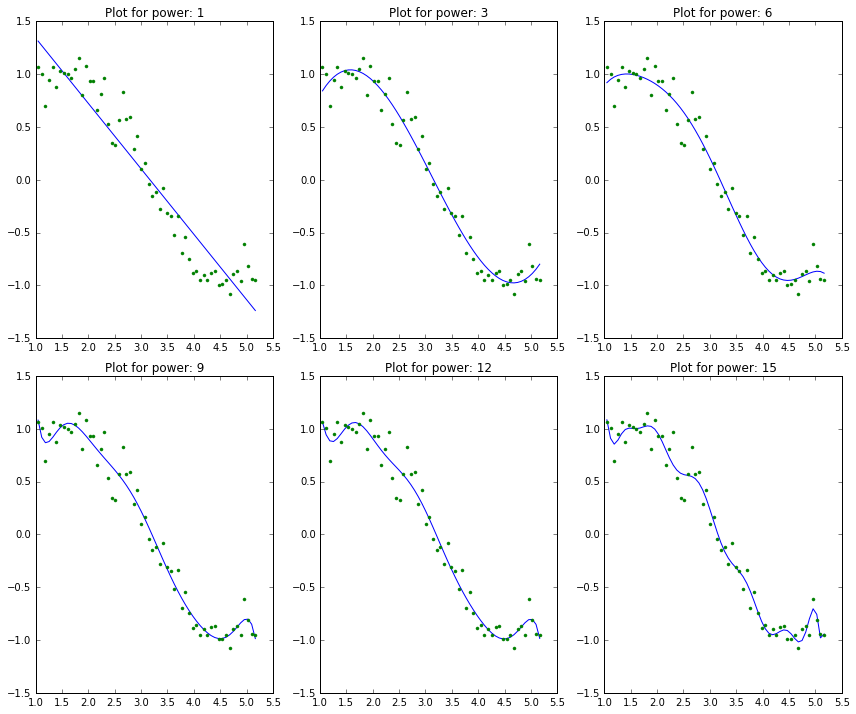

In [14]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [40]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,6.5,2,-0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,6.4,1.9,-0.57,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,2.5,-1,2.9,-1.2,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,2.5,-0.86,2.7,-1.1,0.1,0.0024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,2.4,0.85,-0.86,1.6,-0.87,0.17,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,2.4,-0.54,2.6,-1.8,0.8,-0.27,0.048,-0.0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,2.4,15,-42,51,-32,12,-2.4,0.27,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,2.4,13,-35,42,-26,8.5,-1.5,0.12,0.0017,-0.00057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,2.4,54,-1.9e+02,3e+02,-2.6e+02,1.4e+02,-48,11,-1.6,0.13,-0.0046,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,2.4,-0.95,40,-1.3e+02,1.9e+02,-1.6e+02,83,-28,6.1,-0.84,0.066,-0.0023,NaN,NaN,NaN,NaN,NaN


## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

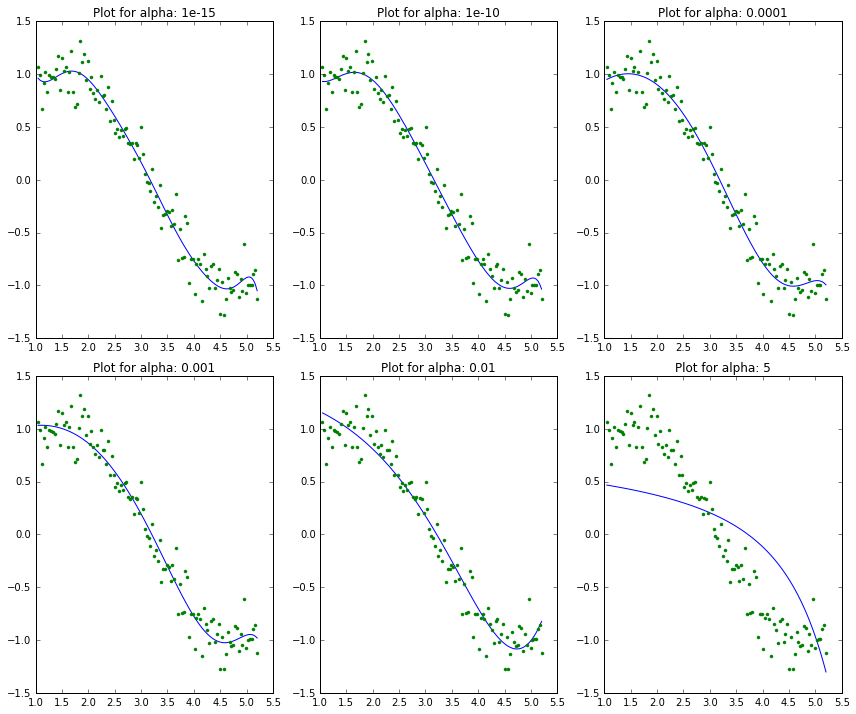

In [42]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [43]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,2.4,15,-42,54,-43,26,-13,4.2,-0.56,-0.089,0.035,0.00085,-0.0012,-1.5e-05,5.4e-05,-7.7e-06,3.4e-07
alpha_1e-10,2.4,6,-14,15,-6.9,1.1,0.11,-0.032,-0.0055,0.00053,0.00025,1.8e-05,-6.8e-06,-1.8e-06,4.9e-08,9.2e-08,-9.1e-09
alpha_1e-08,2.4,1.1,-1.3,1.7,-0.62,0.0066,0.016,0.0016,-0.00019,-7.8e-05,-1.1e-05,-2.6e-07,2.5e-07,7.4e-08,1.2e-08,4.7e-10,-6.2e-10
alpha_0.0001,2.5,0.39,0.78,-0.2,-0.031,-0.0018,0.00029,0.00011,2.1e-05,3.1e-06,3.2e-07,1.6e-08,-3.3e-09,-1.3e-09,-3.1e-10,-6e-11,-1.1e-11
alpha_0.001,2.6,0.85,0.3,-0.098,-0.02,-0.0024,-0.00011,3.2e-05,1.3e-05,3e-06,5.7e-07,9e-08,1.1e-08,7.5e-10,-1.8e-10,-1e-10,-3.4e-11
alpha_0.01,3.3,1.3,-0.11,-0.052,-0.0096,-0.0013,-0.00011,1.9e-06,3.8e-06,1.1e-06,2.5e-07,4.7e-08,7.4e-09,8.9e-10,3.8e-11,-2.3e-11,-1.1e-11
alpha_1,12,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-1e-05,-1.3e-06,-1.5e-07,-1.2e-08,6.8e-10,6.4e-10,2.1e-10,5.5e-11,1.3e-11,2.9e-12
alpha_5,28,0.54,-0.06,-0.0086,-0.0014,-0.00024,-4.1e-05,-7e-06,-1.2e-06,-2e-07,-3.2e-08,-5.3e-09,-8.7e-10,-1.4e-10,-2.2e-11,-3.4e-12,-5e-13
alpha_10,37,0.39,-0.038,-0.0056,-0.00097,-0.00017,-3e-05,-5.3e-06,-9.4e-07,-1.7e-07,-3e-08,-5.3e-09,-9.4e-10,-1.7e-10,-3e-11,-5.3e-12,-9.5e-13
alpha_20,47,0.26,-0.023,-0.0035,-0.00061,-0.00011,-2e-05,-3.7e-06,-6.7e-07,-1.2e-07,-2.3e-08,-4.1e-09,-7.6e-10,-1.4e-10,-2.6e-11,-4.8e-12,-8.9e-13


## LASSO Regression

In [44]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e7)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


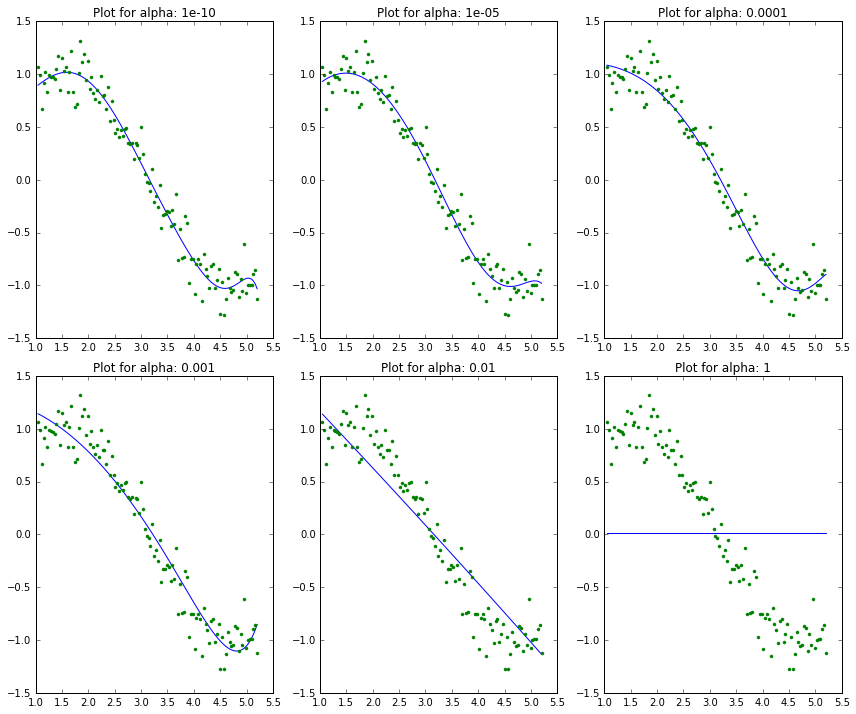

In [45]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 10:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [46]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,2.4,0.82,-0.76,1.4,-0.59,0.028,0.013,0.00093,-0.00016,-5.7e-05,-8.3e-06,-3.3e-07,1.9e-07,6.3e-08,1.1e-08,4.1e-10,-5.5e-10
alpha_1e-10,2.4,0.81,-0.76,1.4,-0.59,0.028,0.013,0.00093,-0.00016,-5.7e-05,-8.3e-06,-3.3e-07,1.9e-07,6.3e-08,1.1e-08,4.1e-10,-5.5e-10
alpha_1e-08,2.4,0.72,-0.54,1.2,-0.54,0.022,0.013,0.0008,-0.00011,-5.9e-05,-7.9e-06,-2.1e-07,1.2e-07,7e-08,1.1e-08,1.6e-10,-5.1e-10
alpha_1e-05,2.4,0.12,1.2,-0.4,-0.0034,-0,0,6.1e-05,4e-05,1e-08,0,0,0,0,-0,-0,-2.6e-11
alpha_0.0001,2.8,1.1,0.024,-0,-0.039,-0,0,0,7.8e-06,6.9e-06,0,0,0,0,-0,-0,-2e-11
alpha_0.001,3.7,1.3,-0,-0.12,-0,-0,-0,0,0,0,0,0,0,3.1e-09,0,0,0
alpha_0.01,7.9,1.7,-0.52,-0.0041,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,0
alpha_1,78,0.013,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,78,0.013,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,78,0.013,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


## Multilayer Perceptron

In [47]:
from sklearn.neural_network import MLPRegressor
def mlp_regression(y, x, neurons, models_to_plot={}):
    #Fit the model
    MLP = MLPRegressor(hidden_layer_sizes=(neurons,neurons,),solver="lbfgs",max_iter=400,activation="tanh",early_stopping=True)
    MLP.fit(x,y)
    y_pred = MLP.predict(x)
    
    #Check if a plot is to be made for the entered neurons
    if neurons in models_to_plot:
        plt.subplot(models_to_plot[neurons])
        plt.tight_layout()
        plt.plot(x,y_pred)
        plt.plot(x,y,'.')
        plt.title('Plot for neurons: %.3g'%neurons)
    
   

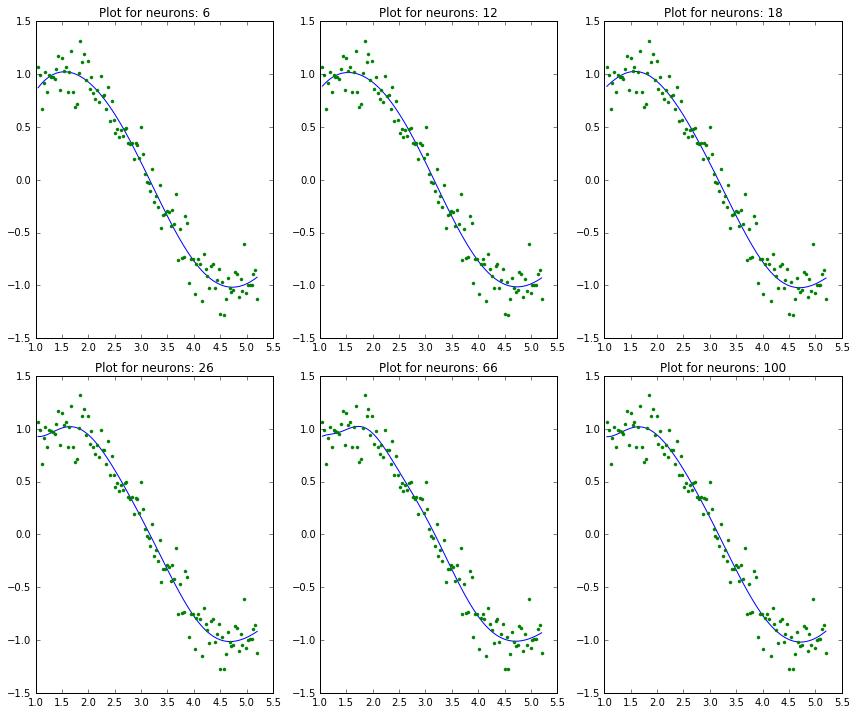

In [48]:
y=y.reshape((len(valores),1))
x=x.reshape((len(valores),1))
#Define the number of neurons to test

n_neurons = [2,6,12,18,26,38,46,66,88,100]


#Define the models to plot
models_to_plot = {6:231, 12:232,18:233, 26:234, 66:235, 100:236}

#Iterate over the 10 neuron values:
for i in range(10):
    mlp_regression(y, x, n_neurons[i], models_to_plot)
    